In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("9-email_classification_svm.csv")

In [4]:
#Email classification
#subject_formality_score -> sender formality score
#sender_relationship_score -> sender relationship score
#email_type -> 0 = Personal, 1 = Work

In [5]:
df.head()

subject_formality_score  sender_relationship_score  email_type
0                -1.496790                   0.779258           0
1                -1.217610                   0.889601           0
2                -0.375945                  -0.823324           1
3                 0.639609                  -0.362827           1
4                -1.342836                  -1.040502           1

In [6]:
df.describe()

subject_formality_score  sender_relationship_score   email_type
count              1000.000000                1000.000000  1000.000000
mean                 -1.009046                  -0.006300     0.498000
std                   0.654219                   1.059501     0.500246
min                  -3.532770                  -2.218219     0.000000
25%                  -1.252867                  -1.006076     0.000000
50%                  -0.994760                   0.439233     0.000000
75%                  -0.754839                   0.994943     1.000000
max                   2.180933                   1.699497     1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    1000 non-null   float64
 1   sender_relationship_score  1000 non-null   float64
 2   email_type                 1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


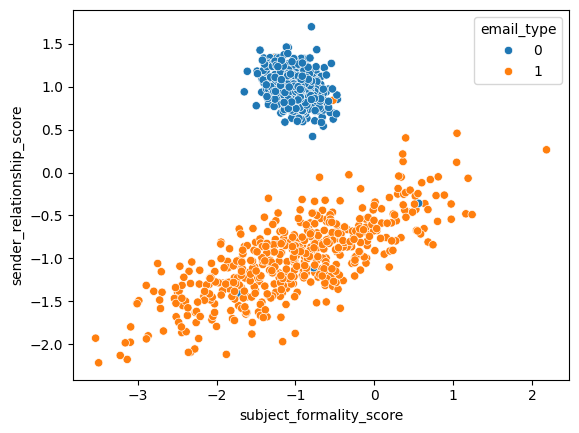

In [8]:
sns.scatterplot(x=df["subject_formality_score"], y=df["sender_relationship_score"], hue=df["email_type"])

plt.show()

In [9]:
df["email_type"].value_counts()

email_type
0    502
1    498
Name: count, dtype: int64

In [10]:
X = df.drop("email_type", axis=1)

y = df["email_type"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.25)

In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC(kernel="linear")

In [15]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       0.99      1.00      1.00       132

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   1]
 [  0 132]]


In [19]:
rbf = SVC() #default kernel, which is "rbf"

In [20]:
rbf.fit(X_train, y_train)
y_pred = rbf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       0.99      1.00      1.00       132

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   1]
 [  0 132]]


In [21]:
df = pd.read_csv("9-loan_risk_svm.csv")

In [22]:
df.head()

credit_score_fluctuation  recent_transaction_volume  loan_risk
0                 -1.439860                   1.283010          1
1                 -0.276571                  -1.232382          0
2                  1.312047                   0.955097          1
3                  1.020706                   0.089485          0
4                  1.513729                   0.580520          1

In [23]:
df.describe()

credit_score_fluctuation  recent_transaction_volume    loan_risk
count               1000.000000                1000.000000  1000.000000
mean                  -0.024200                  -0.018748     0.504000
std                    1.257080                   1.222329     0.500234
min                   -3.562160                  -2.641815     0.000000
25%                   -1.001007                  -0.995190     0.000000
50%                   -0.105200                  -0.142727     1.000000
75%                    1.007451                   0.964210     1.000000
max                    2.984892                   3.338639     1.000000

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score_fluctuation   1000 non-null   float64
 1   recent_transaction_volume  1000 non-null   float64
 2   loan_risk                  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


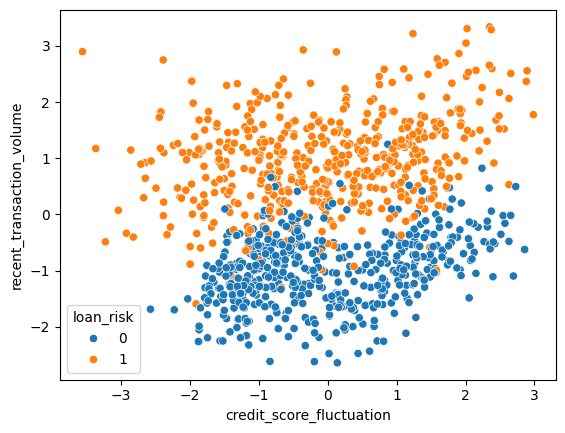

In [25]:
sns.scatterplot(x=df["credit_score_fluctuation"], y=df["recent_transaction_volume"], hue=df["loan_risk"])

plt.show()

In [26]:
X = df.drop("loan_risk", axis=1)

y = df["loan_risk"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [28]:
linear = SVC(kernel="linear")

In [29]:
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       121
           1       0.91      0.93      0.92       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[109  12]
 [  9 120]]


In [30]:
rbf = SVC()

rbf.fit(X_train, y_train)
y_pred = rbf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       121
           1       0.94      0.91      0.93       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[113   8]
 [ 11 118]]


In [31]:
poly = SVC(kernel="poly")

poly.fit(X_train, y_train)
y_pred = poly.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       121
           1       0.90      0.94      0.92       129

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[107  14]
 [  8 121]]


In [32]:
sigmoid = SVC(kernel="sigmoid")

sigmoid.fit(X_train, y_train)
y_pred = sigmoid.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       121
           1       0.83      0.84      0.84       129

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[ 98  23]
 [ 20 109]]


In [34]:
#hyperparameter tuning

In [35]:
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "kernel": ["rbf"],
    "gamma": ["scale", "auto"]
}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

In [38]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']})

In [39]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [40]:
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       121
           1       0.93      0.92      0.93       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[112   9]
 [ 10 119]]


In [41]:
df = pd.read_csv("9-seismic_activity_svm.csv")

In [43]:
df.head()

underground_wave_energy  vibration_axis_variation  seismic_event_detected
0                 9.539392                 -3.000000                       0
1                 9.558241                 -2.939394                       0
2                 9.576669                 -2.878788                       0
3                 9.594678                 -2.818182                       0
4                 9.612272                 -2.757576                       0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   underground_wave_energy   400 non-null    float64
 1   vibration_axis_variation  400 non-null    float64
 2   seismic_event_detected    400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


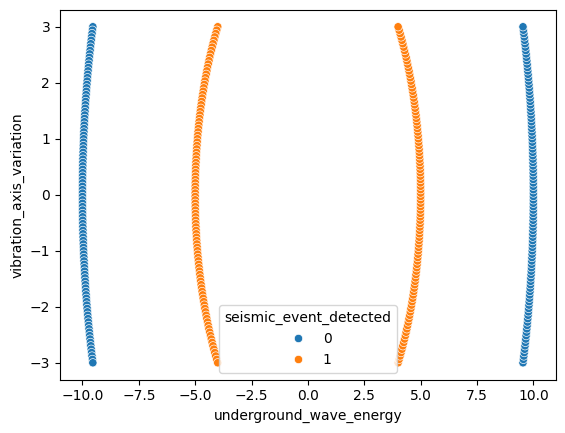

In [45]:
sns.scatterplot(x=df["underground_wave_energy"], y=df["vibration_axis_variation"], hue=df["seismic_event_detected"])

plt.show()

In [46]:
#manual rbf kernel

In [47]:
df.columns

Index(['underground_wave_energy', 'vibration_axis_variation',
       'seismic_event_detected'],
      dtype='object')

In [48]:
df["underground_wave_energy **2"] = df["underground_wave_energy"] ** 2
df["vibration_axis_variation **2"] = df["vibration_axis_variation"] ** 2
df["underground_wave_energy * vibration_axis_varitation"] = df["underground_wave_energy"] * df["vibration_axis_variation"]

In [49]:
df.head()

underground_wave_energy  vibration_axis_variation  seismic_event_detected  \
0                 9.539392                 -3.000000                       0   
1                 9.558241                 -2.939394                       0   
2                 9.576669                 -2.878788                       0   
3                 9.594678                 -2.818182                       0   
4                 9.612272                 -2.757576                       0   

   underground_wave_energy **2  vibration_axis_variation **2  \
0                    91.000000                      9.000000   
1                    91.359963                      8.640037   
2                    91.712580                      8.287420   
3                    92.057851                      7.942149   
4                    92.395776                      7.604224   

   underground_wave_energy * vibration_axis_varitation  
0                                         -28.618176    
1                                         -28.095434    
2                                         -27.569197    
3                                         -27.039548    
4                                         -26.506569

In [50]:
X = df.drop("seismic_event_detected", axis=1)
y = df["seismic_event_detected"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=15)

In [52]:
import plotly.express as px

In [54]:
fig = px.scatter_3d(df, x="underground_wave_energy **2", y="vibration_axis_variation **2", z="underground_wave_energy * vibration_axis_varitation", color="seismic_event_detected")

fig.show()

In [55]:
linear = SVC(kernel="linear")
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       151

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[149   0]
 [  0 151]]


In [56]:
#automatic rbf

In [57]:
df = pd.read_csv("9-seismic_activity_svm.csv")

In [58]:
X = df.drop("seismic_event_detected", axis=1)

y = df["seismic_event_detected"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=15)

In [60]:
rbf = SVC()

In [61]:
rbf.fit(X_train, y_train)

y_pred = rbf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       151

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[149   0]
 [  0 151]]
